In [16]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("results.csv", encoding='utf-8')

In [47]:
df

,date,game,link,platforms,review,reviewer,score,score_100,site,review_length
0,2008-05-23 13:00:00,SingStar,http://www.giantbomb.com/api/review/1900-1/,PlayStation 3,All these karaoke video games have got it all ...,Jeff Gerstmann,4,80,Giant Bomb,950
1,2008-05-20 17:00:00,Haze,http://www.giantbomb.com/api/review/1900-2/,PlayStation 3,Haze attempts to deal with the concept of wart...,Jeff Gerstmann,2,40,Giant Bomb,1165
2,2008-06-20 12:00:00,Metal Gear Solid 4: Guns of the Patriots,http://www.giantbomb.com/api/review/1900-3/,PlayStation 3,Metal Gear Solid 4: Guns of the Patriots is an...,Brad Shoemaker,5,100,Giant Bomb,1200
3,2008-02-29 12:00:00,Poker Smash,http://www.giantbomb.com/api/review/1900-4/,Xbox 360 Games Store,This week's Xbox Live Arcade release is Poker ...,Jeff Gerstmann,4,80,Giant Bomb,492
4,2008-07-06 12:00:00,Battlefield: Bad Company,http://www.giantbomb.com/api/review/1900-5/,Xbox 360,Lots of games have explosions--with all the co...,Jeff Gerstmann,5,100,Giant Bomb,1320
5,2008-07-02 12:00:00,LEGO Indiana Jones: The Original Adventures,http://www.giantbomb.com/api/review/1900-6/,"PlayStation 3, Xbox 360",It's easy to imagine a day when we're all jade...,Brad Shoemaker,3,60,Giant Bomb,726
6,2008-07-02 12:00:00,Robert Ludlum's The Bourne Conspiracy,http://www.giantbomb.com/api/review/1900-7/,"Xbox 360, PlayStation 3",As much as I appreciated the way 2002’s The Bo...,Ryan Davis,3,60,Giant Bomb,680
7,2008-03-01 12:00:00,Burnout Paradise,http://www.giantbomb.com/api/review/1900-8/,"PlayStation 3, Xbox 360",Burnout Paradise is an amazing open-world raci...,Jeff Gerstmann,5,100,Giant Bomb,1198
8,2008-03-07 10:00:00,Professor Layton and the Curious Village,http://www.giantbomb.com/api/review/1900-9/,Nintendo DS,I want to be Professor Layton when I grow up. ...,Jeff Gerstmann,5,100,Giant Bomb,823
9,2008-03-13 15:00:00,Super Smash Bros. Brawl,http://www.giantbomb.com/api/review/1900-10/,Wii,Super Smash Bros. Brawl is a game that's pract...,Jeff Gerstmann,4,80,Giant Bomb,1161


In [17]:
df.mean()

score               5.820811
score_100          70.764865
review_length    1092.237297
dtype: float64

In [21]:
df.groupby(['site']).agg([np.sum, np.mean, np.std])

score                     score_100                        \
               sum      mean       std       sum       mean        std   
site                                                                     
GameSpot    2756.0  6.561905  1.630109     27560  65.619048  16.301094   
Giant Bomb  2323.0  3.525038  0.969392     46460  70.500759  19.387849   
IGN         5689.5  7.379377  1.482715     56895  73.793774  14.827152   

           review_length                           
                     sum         mean         std  
site                                               
GameSpot          524649  1249.164286  415.072647  
Giant Bomb        800745  1215.091047  465.193875  
IGN               695245   901.744488  334.284241

In [25]:
df.groupby(['game']).agg([np.sum, np.mean, np.count_nonzero])

score                      \
                                                     sum  mean count_nonzero   
game                                                                           
#IDARB                                              15.5  7.75             2   
'Splosion Man                                        4.0  4.00             1   
007 Legends                                          2.0  2.00             1   
1001 Spikes                                         16.0  8.00             2   
140                                                  8.0  8.00             1   
1942: Joint Strike                                   3.0  3.00             1   
2014 FIFA World Cup Brazil                           7.5  7.50             1   
3D Dot Game Heroes                                   3.0  3.00             1   
50 Cent: Blood on the Sand                           3.0  3.00             1   
80 Days                                              9.0  9.00             1   
9.03m                                                5.0  5.00             1   
A Bird Story                                        16.8  8.40             2   
A Boy and His Blob                                   4.0  4.00             1   
Aaru's Awakening                                    10.7  5.35             2   
Abyss Odyssey                                        6.7  6.70             1   
Ace Combat Infinity                                  6.0  6.00             1   
Action Henk                                          7.0  7.00             1   
Adventure Time: Explore the Dungeon Because I D...   2.0  2.00             1   
Adventure Time: Explore the Dungeon Because I D...   3.5  3.50             1   
Adventure Time: Hey Ice King! Whyâ€™d you steal o...   3.0  3.00             1   
Adventure Time: The Secret of the Nameless Kingdom   6.0  6.00             1   
Affordable Space Adventures                          8.0  8.00             1   
Afro Samurai                                         3.0  3.00             1   
Age of Booty                                         4.0  4.00             1   
Age of Wonders III                                  15.1  7.55             2   
Age of Wushu                                         7.0  7.00             1   
Air Conflicts: Vietnam                               7.0  3.50             2   
Air Control                                          1.0  1.00             1   
AirMech Arena                                        5.5  5.50             1   
Akiba's Trip: Undead & Undressed                     4.0  4.00             1   
...                                                  ...   ...           ...   
X-Men: Destiny                                       2.0  2.00             1   
XCOM: Enemy Unknown                                 13.5  6.75             2   
XCOM: Enemy Within                                   8.0  8.00             1   
XCOM: Enemy Within -- Commander Edition              9.0  9.00             1   
Xenoblade Chronicles                                16.7  8.35             2   
Xenonauts                                           15.8  7.90             2   
Xeodrifter                                           6.5  6.50             1   
Yaiba: Ninja Gaiden Z                                5.6  5.60             1   
Yakuza 4                                             3.0  3.00             1   
Yoshi's New Island                                  10.9  5.45             2   
You Don't Know Jack                                  4.0  4.00             1   
You're In the Movies                                 3.0  3.00             1   
Young Justice: Legacy                                4.8  4.80             1   
Ys: Memories of Celceta                             15.5  7.75             2   
Zeno Clash                                           4.0  4.00             1   
Zeno Clash II                                        6.4  6.40             1   
Ziggurat                                         

In [31]:
df.groupby(['game']).count().sort(['date'])

,date,link,platforms,review,reviewer,score,score_100,site,review_length
game,,,,,,,,,
Might & Magic X: Legacy,1,1,1,1,1,1,1,1,1
NES Remix 2,1,1,1,1,1,1,1,1,1
NHL 12,1,1,1,1,1,1,1,1,1
NHL 13,1,1,1,1,1,1,1,1,1
The Weaponographist,1,1,1,1,1,1,1,1,1
The Walking Dead: The Game -- Episode 5: No Time Left,1,1,1,1,1,1,1,1,1
The Walking Dead: Survival Instinct,1,1,1,1,1,1,1,1,1
Naruto Shippuden: Ultimate Ninja Storm 3 Full Burst,1,1,1,1,1,1,1,1,1
Natural Doctrine,1,1,1,1,1,1,1,1,1


In [44]:
df.groupby(['reviewer']).count('review').sort('review', ascending=False)

,date,game,link,platforms,review,score,score_100,site,review_length
reviewer,,,,,,,,,
Jeff Gerstmann,256,256,256,256,256,256,256,256,256
Brad Shoemaker,130,130,130,126,130,130,130,130,130
Alex Navarro,107,107,107,107,107,107,107,107,107
Ryan Davis,106,106,106,106,106,106,106,106,106
Vince Ingenito,57,57,57,57,57,57,57,57,57
Kevin VanOrd,54,54,54,54,54,54,54,54,54
Dan Stapleton,47,47,47,47,47,47,47,47,47
Colin Moriarty,44,44,44,44,44,44,44,44,44
Leif Johnson,44,44,44,44,44,44,44,44,44


In [46]:
df.groupby('reviewer').review.nunique

<bound method SeriesGroupBy.nunique of <pandas.core.groupby.SeriesGroupBy object at 0x000000000F1E0940>>

In [74]:
p = df.groupby(['reviewer']).score_100.agg([np.mean]).sort('mean', ascending=False)

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

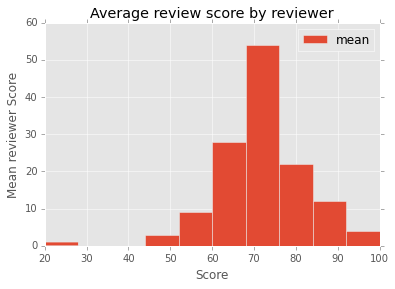

In [86]:
p1 = p.plot(kind='hist', title='Average review score by reviewer')
p1.set_xlabel('Score')
p1.set_ylabel('Mean reviewer Score')
plt.savefig('mean_review_score.png')

This indicates that reviewers tend to score games around the 70 to 80 point mark

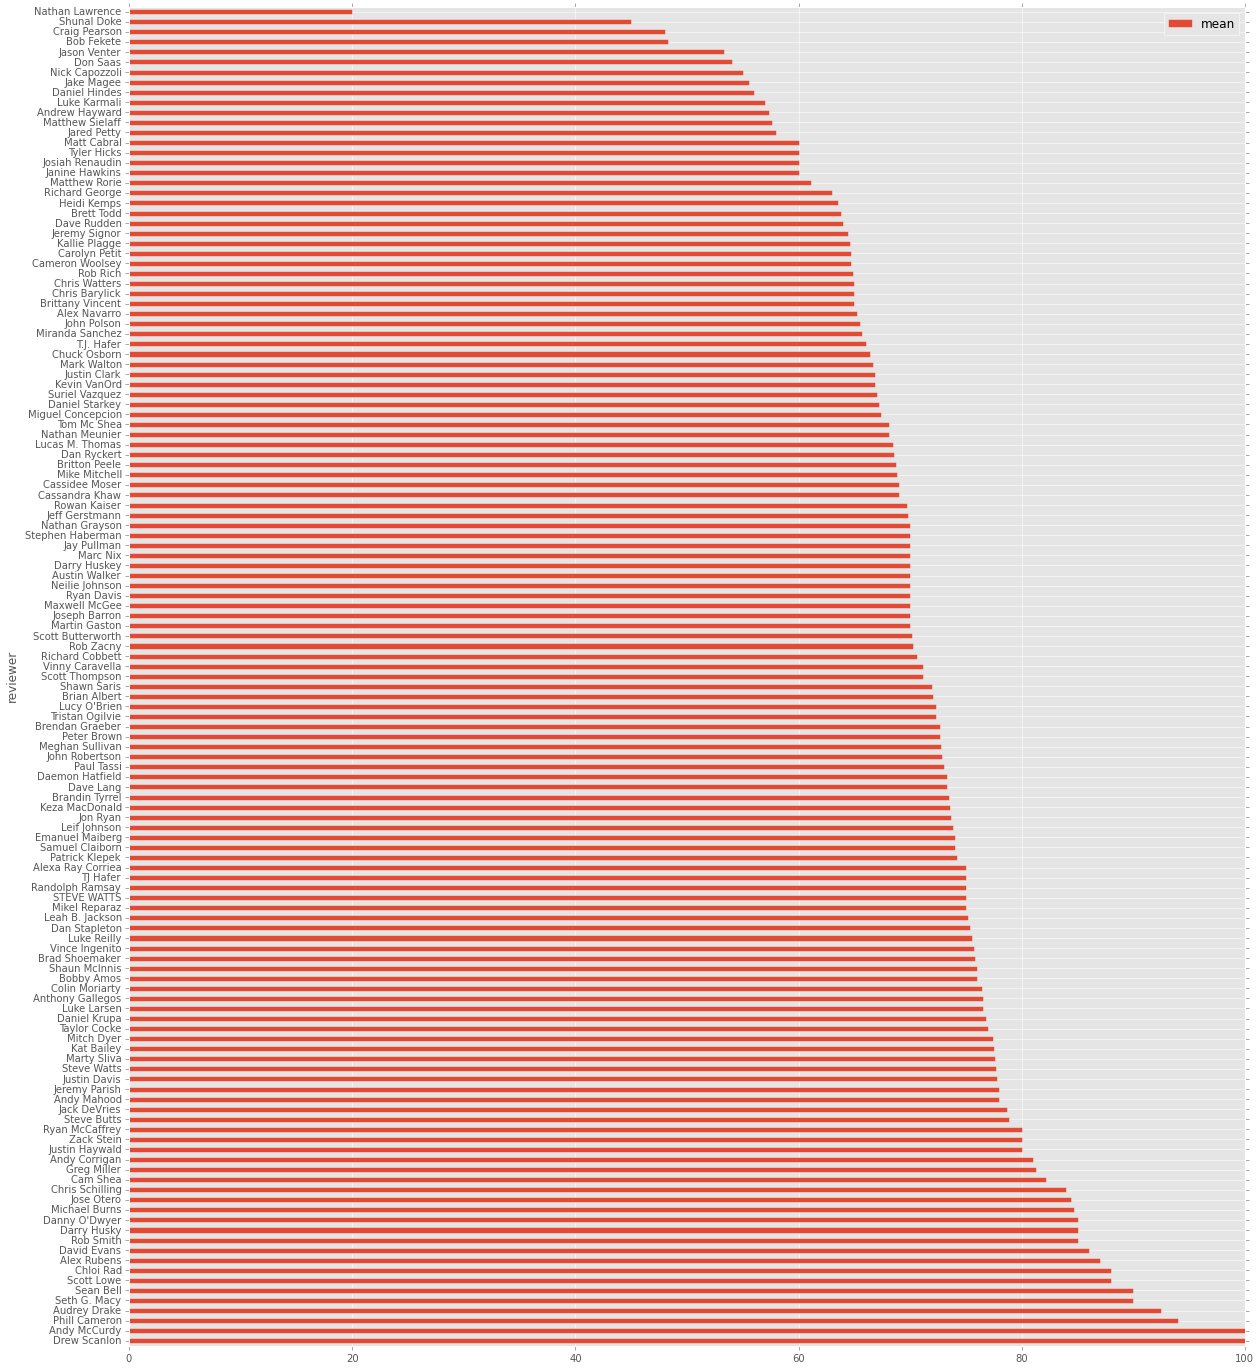

In [88]:
p.plot(kind='barh', figsize=(20, 24))
plt.savefig('average_review_score.png')

In [93]:
p[(p['mean']>71)]

,mean
reviewer,
Drew Scanlon,100.000000
Andy McCurdy,100.000000
Phill Cameron,94.000000
Audrey Drake,92.500000
Seth G. Macy,90.000000
Sean Bell,90.000000
Scott Lowe,88.000000
Chloi Rad,88.000000
Alex Rubens,87.000000


In [119]:
b = df.groupby(['reviewer'])

In [126]:
m = b.mean().sort('review_length', ascending=False)

In [144]:
x = pd.Series(m['review_length'])
y = pd.Series(m['score_100'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002137C3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029936208>]], dtype=object)

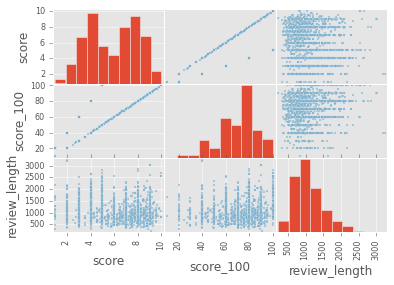

In [151]:
scatter_matrix(df)

In [152]:
rev = pd.Series(df['review'])

In [155]:
import nltk
from nltk import bigrams
from nltk.util import ngrams

In [159]:
mylist = list(rev)

In [166]:
# download a bunch of Natural Language Processing libraries from the Natural Language Toolkit
# http://www.nltk.org/
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.probability import FreqDist


import os

In [255]:
much_bigrams = []
much_text = []
for i in mylist:
    # tokenize our strings by parsing by whitespace
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(i)
        
    # lower case all the tokens
    tokens = [word.lower() for word in tokens]
    
    # use the english stopwords from nltk.corpus
    stop = stopwords.words('english')
    tokens = [j for j in tokens if j not in stop]
    
    # Snowball Stem words by English
    stemmer = SnowballStemmer("english")
    tokens = [stemmer.stem(word) for word in tokens]

    # check to see if the directory exists
    if not os.path.exists('output'):
        os.makedirs('output')
    
    # count and write unigrams
    unigrams = dict(FreqDist(tokens))
    
    # Find and count bigrams
    # Using http://www.nltk.org/howto/collocations.html
    bigrams = dict(FreqDist(nltk.bigrams(tokens)))
    
    
    # Find and count trigrams
    trigrams = dict(FreqDist(nltk.trigrams(tokens)))
    
 
    
    # append our tokens into a super dictionary of all tokens
    much_text += tokens
    
    

In [249]:
t = pd.DataFrame(much_text)

In [256]:
much_text

[u'karaok',
 u'video',
 u'game',
 u'got',
 u'wrong',
 u'.',
 u'focus',
 u'score',
 u'base',
 u'well',
 u'emul',
 u'pitch',
 u'cadenc',
 u'origin',
 u'song',
 u'.',
 u'actual',
 u'karaok',
 u',',
 u'actual',
 u'get',
 u'sing',
 u'song',
 u'littl',
 u'well',
 u'sing',
 u'like',
 u'dude',
 u'creed',
 u'whatev',
 u'.',
 u"'s",
 u'embarrass',
 u'.',
 u"'s",
 u'self',
 u'-deprecation.',
 u"'s",
 u'make',
 u'song',
 u'.',
 u"'s",
 u'public',
 u'drunken',
 u'.',
 u"'s",
 u'jump',
 u'seat',
 u'like',
 u'lunat',
 u'rush',
 u'whatev',
 u'pass',
 u'stage',
 u'friend',
 u'got',
 u'sing',
 u'build',
 u'buttercup',
 u'.',
 u'back',
 u'playstat',
 u'2',
 u',',
 u'soni',
 u"'s",
 u'singstar',
 u'seri',
 u'popular',
 u',',
 u'provid',
 u'basic',
 u'abil',
 u'judg',
 u'sing',
 u'.',
 u'playstat',
 u'3',
 u',',
 u'provid',
 u'someth',
 u'close',
 u'resembl',
 u'karaok',
 u'.it',
 u'nastytim',
 u'!of',
 u'cours',
 u',',
 u'basic',
 u'concept',
 u'singstar',
 u'hasn',
 u"'t",
 u'realli',
 u'chang',
 u'.',
 

In [177]:
# Gensim is Topic modeling for humans
import logging, gensim, bz2
from gensim import corpora, models, similarities
from gensim.models.ldamodel import LdaModel
import requests
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
import math
import itertools
import numpy as np

In [175]:
# https://radimrehurek.com/gensim/tut1.html
stoplist = stopwords.words('english')
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in mylist]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

# from pprint import pprint
# use to print all unigrams
# pprint(texts)

In [179]:
# create a dictionary and corpus from the text document using Gensim
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# num_topics specifies the number of topics to find
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)
corpus_lsi = lsi[corpus_tfidf] 
# print out lists of unigrams per topic topics
# using Latent Semantic Analysis
lsi.print_topics(10)

[u'0.113*"\'\'," + 0.079*"you\'ll" + 0.072*"it\'s" + 0.065*"you\'re" + 0.057*"game\'s" + 0.053*"2" + 0.053*"mode" + 0.053*"enemies" + 0.052*"players" + 0.050*"characters"',
 u'-0.680*"=" + -0.359*"{\\n" + -0.308*"var" + -0.159*"+" + -0.137*"+=" + -0.137*"}\\n" + -0.120*"?" + -0.118*":" + -0.103*">" + -0.103*"windowlocation"']

In [181]:
# serialize the sample texts as a corpus file
corpora.MmCorpus.serialize('output/corpus.mm', corpus)

In [182]:
# load the word mapping dictionary
id2word = dictionary
# load the sample corpus 
mm = gensim.corpora.MmCorpus('output/corpus.mm')

In [183]:
print(mm)

MmCorpus(1850 documents, 46881 features, 831272 non-zero entries)


In [258]:
much_text

[u'karaok',
 u'video',
 u'game',
 u'got',
 u'wrong',
 u'.',
 u'focus',
 u'score',
 u'base',
 u'well',
 u'emul',
 u'pitch',
 u'cadenc',
 u'origin',
 u'song',
 u'.',
 u'actual',
 u'karaok',
 u',',
 u'actual',
 u'get',
 u'sing',
 u'song',
 u'littl',
 u'well',
 u'sing',
 u'like',
 u'dude',
 u'creed',
 u'whatev',
 u'.',
 u"'s",
 u'embarrass',
 u'.',
 u"'s",
 u'self',
 u'-deprecation.',
 u"'s",
 u'make',
 u'song',
 u'.',
 u"'s",
 u'public',
 u'drunken',
 u'.',
 u"'s",
 u'jump',
 u'seat',
 u'like',
 u'lunat',
 u'rush',
 u'whatev',
 u'pass',
 u'stage',
 u'friend',
 u'got',
 u'sing',
 u'build',
 u'buttercup',
 u'.',
 u'back',
 u'playstat',
 u'2',
 u',',
 u'soni',
 u"'s",
 u'singstar',
 u'seri',
 u'popular',
 u',',
 u'provid',
 u'basic',
 u'abil',
 u'judg',
 u'sing',
 u'.',
 u'playstat',
 u'3',
 u',',
 u'provid',
 u'someth',
 u'close',
 u'resembl',
 u'karaok',
 u'.it',
 u'nastytim',
 u'!of',
 u'cours',
 u',',
 u'basic',
 u'concept',
 u'singstar',
 u'hasn',
 u"'t",
 u'realli',
 u'chang',
 u'.',
 

In [211]:
df_tokens = pd.DataFrame(much_text, columns=['words'])

In [262]:
print rev

0       All these karaoke video games have got it all ...
1       Haze attempts to deal with the concept of wart...
2       Metal Gear Solid 4: Guns of the Patriots is an...
3       This week's Xbox Live Arcade release is Poker ...
4       Lots of games have explosions--with all the co...
5       It's easy to imagine a day when we're all jade...
6       As much as I appreciated the way 2002’s The Bo...
7       Burnout Paradise is an amazing open-world raci...
8       I want to be Professor Layton when I grow up. ...
9       Super Smash Bros. Brawl is a game that's pract...
10      We're not there yet, but we're getting closer ...
11      Rocketmen: Axis of Evil takes the classic dual...
12      It's rare for a game publisher to have an imme...
13      With a campaign that's more of a different tak...
14      Bowling pins. Toilet seats. Drive shafts. Deer...
15      Here's that Mayan-themed Xbox Live Arcade puzz...
16      Viking: Battle for Asgard has some really grea...
17      Hot Sh

In [267]:
# tokenize our strings 
tokens = [word_tokenize(toy) for toy in rev]

# use English stop words
stop = stopwords.words('english')

# Strip stopwords
toy_strip   = [[word.lower() for word in document if not word in stop] for document in tokens]

# Snowball Stem words by English
# Stem words
stemmer = SnowballStemmer("english")
toy_stems = [[stemmer.stem(word) for word in texts] for texts in toy_strip]

In [268]:
# create a dictionary of stems 
toy_dictionary = corpora.Dictionary(toy_stems)
print(toy_dictionary.token2id)

{u'fawn': 6734, u'release.get': 3001, u'circuitri': 29340, u'mustachio': 13913, u'woodi': 38370, u'plainview': 34688, u'spideri': 10327, u'askew': 24486, u'babel': 33979, u'scold': 12918, u'self-referenti': 13137, u'accret': 32289, u'everything.a': 18584, u'grimsd\xf3tt\xedr': 13583, u're-shel': 11021, u'beginning.it': 4819, u'crossbar': 26385, u'rickman': 36638, u'big-orchestra': 16202, u'fan-fav': 30088, u'disappointing.mario': 23163, u'spider-': 14644, u'undead\\': 37387, u'politician': 16516, u'fractal': 30181, u'viewabl': 22444, u'jrpg': 12070, u'elvi': 14836, u'wooden': 5989, u'showcas': 2353, u'wednesday': 21863, u'multipurpos': 23247, u'crotch': 15851, u'asami': 27085, u'here.metro': 13458, u'player-boost': 8634, u'seven-': 26477, u'unlocked.it': 21295, u'popularis': 28588, u'bass-heavi': 6035, u'dude-on-dud': 14934, u'3-iron': 31017, u'c.o.u.n.t.e.r': 28047, u'sooth': 4717, u'sooti': 16465, u'fuert': 8723, u'dialogu': 730, u'usenet': 14273, u'spider-bot': 37367, u'databank': 2

In [281]:
toys_df = pd.DataFrame(toy_dictionary.values(), columns=['words'])

In [283]:
toys_df.groupby('words').count()

""
words
!
#
$
%
&
'
''
'-
'a
